# Overview
Sebuah website bernama [salaries.ai-job.net](https://salaries.ai-jobs.net/) adalah website yang menampung data gaji "data scientist" di seluruh dunia. Data-data ini nantinya bisa digunakan oleh berbagai pihak untuk mendapatkan gambaran besar mengenai gaji "data scientist" dan faktor-faktor yang mempengaruhi nilai gaji tersebut. Project "data scientist" yang penulis buat saat ini menggunakan data dari website tersebut untuk membuat model "machine learning" yang bisa memperkirakan berapa kemungkinan gaji seorang "data scientist".

Deskripsi Data: <br>
- work_year: tahun saat menerima gaji
- experience_level: tingkat pengalaman "data scientist" yang terdiri dari EN(Entry-level/Junior), Ml(Midlevel/Intermediate), SE(Senior-level/Expert), EX(Executive-level/Director)
- employment_type: jenis kontrak kerja, PT(Part-time), FT(Full-time), CT(Contract), FL(Freelance)
- job_title: jenis pekerjaan yang dikerjakan ditahun tersebut
- salary: jumlah gaji kotor
- salary_curency: mata uang gaji yang dibayarkan
- salaryinusd: jumlah gaji dikonversikan ke USD dengan kurs tahun diterimanya gaji
- employee_residence: kode negara "data scientist" dalam ISO 3166
- remote_ratio: rasio pekerjaan yang dikerjakan secara "remote", 0(dibawah 20% "remote"), 50 (setengah "remote"), 100("remote" total)
- company_location: kode lokasi kantor "data scientist" dalam ISO 3166
- company_size: jumlah rata-rata pekerja di perusahaan pada tahun itu, S(pekerja dibawah 50 orang), M(jumlah pekerja antara 50-250 orang), L(jumlah pekerja diatas 250 orang)

# Exploratory Data Analysis

### Data Cleansing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# membaca data yang akan dianalisis
df=pd.read_csv('salaries.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           949 non-null    int64 
 1   experience_level    949 non-null    object
 2   employment_type     949 non-null    object
 3   job_title           949 non-null    object
 4   salary              949 non-null    int64 
 5   salary_currency     949 non-null    object
 6   salary_in_usd       949 non-null    int64 
 7   employee_residence  949 non-null    object
 8   remote_ratio        949 non-null    int64 
 9   company_location    949 non-null    object
 10  company_size        949 non-null    object
dtypes: int64(4), object(7)
memory usage: 81.7+ KB


In [3]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Scientist,180000,USD,180000,US,100,US,L
1,2022,SE,FT,Data Scientist,165000,USD,165000,US,100,US,L
2,2022,SE,FT,Applied Machine Learning Scientist,108000,USD,108000,US,0,US,L


In [4]:
# Melihat apakah ada 'missing data'
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Observasi: Tidak ada missing data

In [5]:
# melihat apakah ada 'duplicated data'
df.duplicated().sum()

120

In [6]:
# melihat seperti apa keadaan data 'duplicated'
df[df.duplicated(keep=False)]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Scientist,180000,USD,180000,US,100,US,L
31,2022,SE,FT,Data Scientist,191475,USD,191475,US,100,US,M
32,2022,SE,FT,Data Scientist,141525,USD,141525,US,100,US,M
37,2022,SE,FT,Data Scientist,140000,USD,140000,US,100,US,M
42,2022,SE,FT,Data Engineer,250000,USD,250000,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
629,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
690,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
775,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
855,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L


Observasi: Data-data yang sama tidak berada dalam baris yang berdekatan sehingga kemungkinan adanya error saat input kecil. Karena data tidak memiliki kolom ID untuk membedakan kolom-kolom 'duplicated', penulis mengasumsikan bahwa kolom-kolom duplicated ini memang berasal dari orang-orang yang berbeda.

### Statistical Summary

In [7]:
# memisahkan kolom numerikal dan kategorikal
df_nums=df.select_dtypes(exclude=['object']).columns
df_cats=df.select_dtypes(include=['object']).columns

In [8]:
# menganalisis kolom numerikal
df[df_nums].describe()

,work_year,salary,salary_in_usd,remote_ratio
count,949.000000,9.490000e+02,949.000000,949.000000
mean,2021.605901,2.734528e+05,119266.416228,66.859852
std,0.630289,1.269692e+06,68697.661087,43.516842
min,2020.000000,2.324000e+03,2324.000000,0.000000
25%,2021.000000,7.500000e+04,69495.000000,0.000000
50%,2022.000000,1.230000e+05,113000.000000,100.000000
75%,2022.000000,1.730000e+05,160000.000000,100.000000
max,2022.000000,3.040000e+07,600000.000000,100.000000


Observasi:
- Relawan data scientist yang memberikan informasi di website tersebut, rata-rata memberikan informasinya gajinya di tahun 2021.
- Gaji rata-rata 'data scientist' berdasarkan data dari website adalah 119266.4 USD (sekitar 120,000 USD) pertahun.
- Rata-rata persentase jenis pekerjaan data scientist berdasarkan website adalah 66.9% remote.

In [9]:
# menganalisis kolom kategorikal 
df[df_cats].describe()

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,949,949,949,949,949,949,949
unique,4,4,57,17,62,58,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,507,926,232,680,595,620,582


Observasi:
- Tiap kolom kategorikal memiliki unique value yang lebih dari dua buah
- Gambaran umum relawan data scientist yang memberikan informasinya ke website [salaries.ai-job.net](https://salaries.ai-jobs.net/) adalah seorang data scientist senior, berlokasi di US dan bekerja full time di perusahaan dengan ukuran middle (50-250) pegawai.

### Univariate Analysis

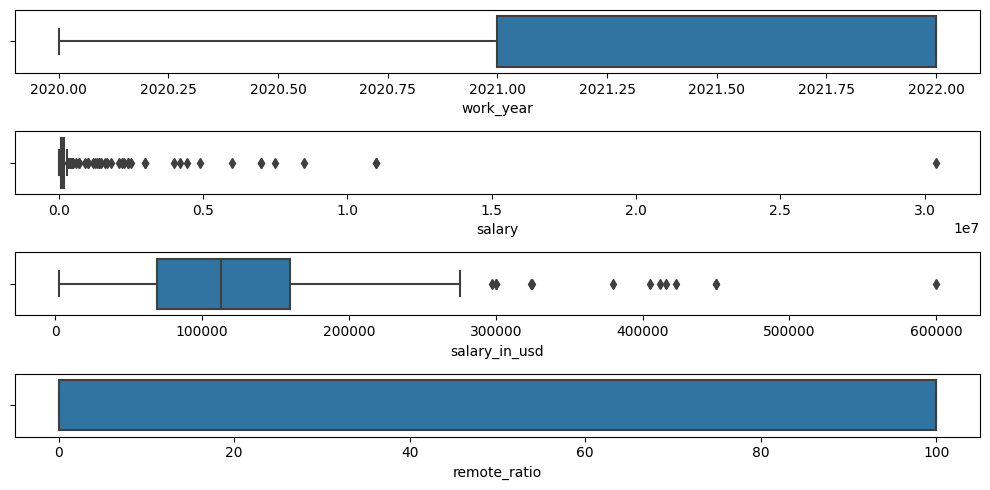

In [10]:
# melihat outlier untuk kolom-kolom numerikal menggunakan boxplot
import warnings
warnings.filterwarnings('ignore')

fig,axes=plt.subplots(nrows=4,ncols=1,figsize=(10,5),dpi=100)
for i in range(0,len(df_nums)):
    sns.boxplot(df[df_nums[i]],ax=axes[i])
fig.tight_layout()

Observasi: 
- Kebanyakan relawan data scientist memasukkan informasi gajinya ke website pada rentang tahun 2021 sampai 2022
- Kolom 'salary' memiliki sangat banyak outlier karena mata uang yang digunakan untuk mengukur salary tersebut berbeda. Kolom ini dibiarkan saja karena tidak akan digunakan dalam pemodelan dan analisis.
- Kolom 'salary_in_usd' memiliki banyak outlier sehingga kolom ini akan di analisis lebih lanjut
- Kolom 'remote_ratio' dan 'work_year' tidak memiliki outlier

In [11]:
# Analisis outlier kolom "salary_in_usd"

Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR

df[df['salary_in_usd']>=Upper_Whisker].sort_values(by='salary_in_usd',ascending=False).reset_index()

,index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,895,2021,EX,FT,Principal Data Engineer,600000,USD,600000,US,100,US,L
1,710,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
2,767,2021,MI,FT,Financial Data Analyst,450000,USD,450000,US,100,US,L
3,941,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
4,866,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
5,944,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
6,651,2022,SE,FT,Data Analytics Lead,405000,USD,405000,US,100,US,L
7,656,2022,SE,FT,Applied Data Scientist,380000,USD,380000,US,100,US,L
8,889,2020,EX,FT,Director of Data Science,325000,USD,325000,US,100,US,L
9,597,2022,EX,FT,Data Engineer,324000,USD,324000,US,100,US,M


Observasi: Walaupun beberapa outlier memiliki nilai yang jauh dari "Upper Whisker", nilai outlier tersebut masih masuk akal karena faktor-faktor lain dalam data seperti tingkat pengalaman, lokasi perusahaan, dan lain sebagainya.

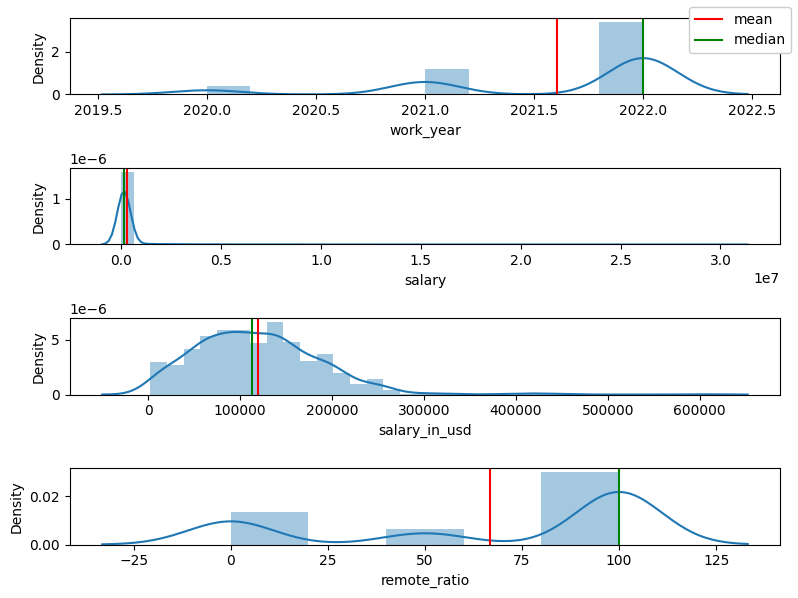

In [12]:
# melihat tingkat 'skew' kolom-kolom numerikal yang ada menggunakan grafik distribusi
fig,axes=plt.subplots(nrows=4,ncols=1,figsize=(8,6),dpi=100)

sns.distplot(df[df_nums[0]],ax=axes[0],kde=True)
mean=axes[0].axvline(df[df_nums[0]].mean(),color='red',label='mean')
median=axes[0].axvline(df[df_nums[0]].median(),color='green',label='median')

sns.distplot(df[df_nums[1]],ax=axes[1],kde=True)
mean=axes[1].axvline(df[df_nums[1]].mean(),color='red',label='mean')
median=axes[1].axvline(df[df_nums[1]].median(),color='green',label='median')

sns.distplot(df[df_nums[2]],ax=axes[2],kde=True)
mean=axes[2].axvline(df[df_nums[2]].mean(),color='red',label='mean')
median=axes[2].axvline(df[df_nums[2]].median(),color='green',label='median')

sns.distplot(df[df_nums[3]],ax=axes[3],kde=True)
mean=axes[3].axvline(df[df_nums[3]].mean(),color='red',label='mean')
median=axes[3].axvline(df[df_nums[3]].median(),color='green',label='median')

fig.legend(handles=[mean,median],loc='upper right',framealpha=1)
fig.tight_layout()

Observasi:
- Kolom 'work_year' dan 'remote_ratio' masing masing hanya memiliki 3 unique value, sehingga grafik distribusinya terlihat aneh. Kedua kolom ini tidak perlu di analisis tingkat skew-nya.
- Kolom 'salary' menggunakan mata uang yang berbeda-beda sehingga banyak titik data yang nilainya terlalu besar. Kolom ini tidak diperhatikan karena sudah ada penggantinya yaitu kolom 'salary_in_usd'.
- Kolom 'salary_in_usd' skew ke kanan sehingga akan kolom ini akan dianalisis lebih lanjut nantinya.

In [13]:
# mempersiapkan data frame untuk analisis piechart
dfp=df.copy()

In [14]:
# mengurangi unique value dari kolom 'job_title' untuk mempermudah analisis dan pembuatan model machine learningnya
Data_Scientist = ['Data Scientist','Data Science Manager', 'Research Scientist', 'Machine Learning Scientist', 'AI Scientist', 
                  'Applied Machine Learning Scientist','Director of Data Science', 'ML Engineer','Data Science Consultant',
                  'Principal Data Scientist', 'Applied Data Scientist', 'Computer Vision Engineer', 'Lead Data Scientist',
                  'Machine Learning Developer', 'Computer Vision Software Engineer', 'Head of Data Science', 
                  'Machine Learning Engineer', 'Lead Machine Learning Engineer', '3D Computer Vision Researcher', 
                  'Machine Learning Research Engineer', 'NLP Engineer', 'Machine Learning Manager', 
                  'Head of Machine Learning', 'Staff Data Scientist']
Data_Engineer= ['Data Engineer','Analytics Engineer', 'Data Architect', 'ETL Developer', 'Data Engineering Manager', 'Lead Data Engineer',
                'Machine Learning Infrastructure Engineer', 'Data Analytics Engineer', 'Principal Data Engineer',
                'Data Science Engineer', 'Director of Data Engineering', 'Cloud Data Engineer', 'Big Data Engineer',
                'Data Operations Analyst','Data Manager', 'Data Operations Engineer', 'Cloud Data Architect']
Data_Analyst= ['Data Analyst','BI Data Analyst', 'Data Analytics Manager', 'Business Data Analyst', 'Data Specialist', 'Head of Data', 'Product Data Analyst', 'Financial Data Analyst', 'Lead Data Analyst', 'Principal Data Analyst', 'Applied Scientist', 'Data Analytics Lead', 'Data Analytics Consultant', 'Marketing Data Analyst', 'Big Data Architect', 'Finance Data Analyst']

def kategori_job(x):
    rtrn=''
    if x in Data_Scientist:
        rtrn='Data Scientist'
    elif x in Data_Engineer:
        rtrn='Data Engineer'
    elif x in Data_Analyst:
        rtrn='Data Analyst'
    else:
        rtrn='Another'
    return (rtrn)

dfp[df_cats[2]]=dfp[df_cats[2]].apply(kategori_job)

In [15]:
# mengurangi unique value dari kolom 'salary_currency' untuk mempermudah analisis pie chart
countries_more_than_ten=[]
countries=dfp[df_cats[3]].value_counts().reset_index()
for i in range(0,len(countries)):
    if countries.iloc[i][1]>10:
        countries_more_than_ten+=[countries.iloc[i][0]]
        
dfp[df_cats[3]]=dfp[df_cats[3]].apply(lambda x:'other' if x not in countries_more_than_ten else x)

In [16]:
# mengurangi unique value dari kolom 'employee_residence' untuk mempermudah analisis pie chart
countries_more_than_ten=[]
countries=dfp[df_cats[4]].value_counts().reset_index()
for i in range(0,len(countries)):
    if countries.iloc[i][1]>10:
        countries_more_than_ten+=[countries.iloc[i][0]]
        
dfp[df_cats[4]]=dfp[df_cats[4]].apply(lambda x:'other' if x not in countries_more_than_ten else x)

In [17]:
# mengurangi unique value dari kolom 'company_location' untuk mempermudah analisis pie chart
countries_more_than_ten=[]
countries=dfp[df_cats[5]].value_counts().reset_index()
for i in range(0,len(countries)):
    if countries.iloc[i][1]>10:
        countries_more_than_ten+=[countries.iloc[i][0]]
        
dfp[df_cats[5]]=dfp[df_cats[5]].apply(lambda x:'other' if x not in countries_more_than_ten else x)

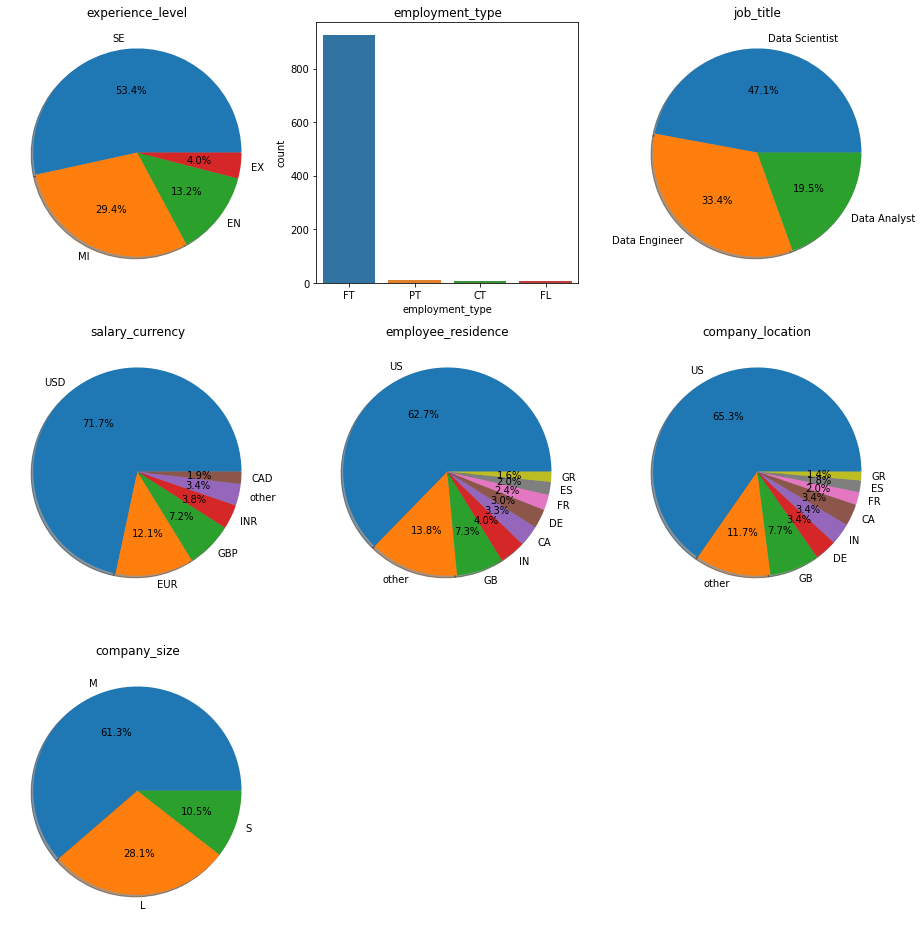

In [18]:
# Membuaat piechart untuk kolom kategorikal

fig=plt.figure(figsize=(13,13))

x = plt.subplot2grid((3,3),(0,0))
x.pie(dfp[df_cats[0]].value_counts().reset_index()[df_cats[0]],
      labels=dfp[df_cats[0]].value_counts().reset_index()['index'],
      autopct='%1.1f%%', shadow=True)
x.title.set_text(df_cats[0])

x = plt.subplot2grid((3,3),(0,1))
sns.countplot(dfp[df_cats[1]])
x.title.set_text(df_cats[1])

x = plt.subplot2grid((3,3),(0,2))
x.pie(dfp[df_cats[2]].value_counts().reset_index()[df_cats[2]],
      labels=dfp[df_cats[2]].value_counts().reset_index()['index'],
      autopct='%1.1f%%', shadow=True)
x.title.set_text(df_cats[2])

x = plt.subplot2grid((3,3),(1,0))
x.pie(dfp[df_cats[3]].value_counts().reset_index()[df_cats[3]],
      labels=dfp[df_cats[3]].value_counts().reset_index()['index'],
      autopct='%1.1f%%', shadow=True)
x.title.set_text(df_cats[3])

x = plt.subplot2grid((3,3),(1,1))
x.pie(dfp[df_cats[4]].value_counts().reset_index()[df_cats[4]],
      labels=dfp[df_cats[4]].value_counts().reset_index()['index'],
      autopct='%1.1f%%', shadow=True)
x.title.set_text(df_cats[4])

x = plt.subplot2grid((3,3),(1,2))
x.pie(dfp[df_cats[5]].value_counts().reset_index()[df_cats[5]],
      labels=dfp[df_cats[5]].value_counts().reset_index()['index'],
      autopct='%1.1f%%', shadow=True)
x.title.set_text(df_cats[5])

x = plt.subplot2grid((3,3),(2,0))
x.pie(dfp[df_cats[6]].value_counts().reset_index()[df_cats[6]],
      labels=dfp[df_cats[6]].value_counts().reset_index()['index'],
      autopct='%1.1f%%', shadow=True)
x.title.set_text(df_cats[6])
            
plt.tight_layout()
plt.show()

Observasi:
- Umumnya "data scientist" yang berpartisipasi dalam survey adalah "data scientist" senior (lebih dari 50%).
- Hampir seluruh "data scientist" dalam survey bekerja "Full Time", sangat sedikit sekali yang tidak.
- Jenis pekerjaan "data scientist" dalam survey bisa dibagi menjadi 3 kategori yaitu "Data Scientist", "Data Engineer" dan "Data Analyst". "Data Scientist" adalah kategori dengan persentase terbesar yang hampir mendekati 50% dari seluruh data.
- Mata uang yang paling banyak digunakan dalam pendapatan "data scientist" yang ikut survey adalah USD, dengan persentasi lebih dari 70 persen. Mata uang paling banyak berikutnya adalah EUR namun hanya 12%, sisanya adalah mata-mata uang lain yang persentasenya jauh lebih kecil.
- Tempat tinggal "data scientist" yang ikut survey umumnya adalah United States dengan persentase mencapai 60%, berikutnya adalah Great Britain dengan persentase hanya 7%, berikutnya adalah negara-negara lain yang persentasenya jauh lebih kecil.
- Lokasi perusahaan yang paling banyak terdapat di United State dengan persentase mencapai 65%, di ikuti oleh Great Britain dengan persentasi hanya 7%, sisanya adalah negara-negara lain yang persentasenya jauh lebih sedikit.
- Ukuran perusahaan tempat kebanyakan "data scientist" yang ikut survey bekerja adalah 50-250 orang dengan persentase mencapai 60%
- Sebagai catatan, data yang ada dalam website ini belum tentu menggambarkan keadaan "data scientist" di seluruh dunia. Data ini hanya menggambarkan keadaan "data scientist" yang mengetahui keberadaan website [salaries.ai-job.net](https://salaries.ai-jobs.net/) dan mau mengisi survey di website tersebut 

### Multivariate Analysis

<AxesSubplot:>

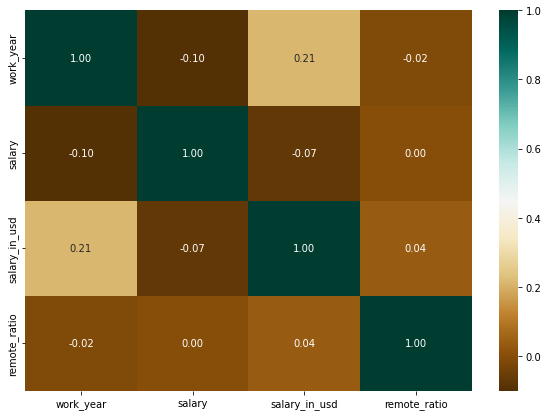

In [19]:
# heatmap
correlation=df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation,annot=True,
           fmt='.2f',cmap='BrBG')

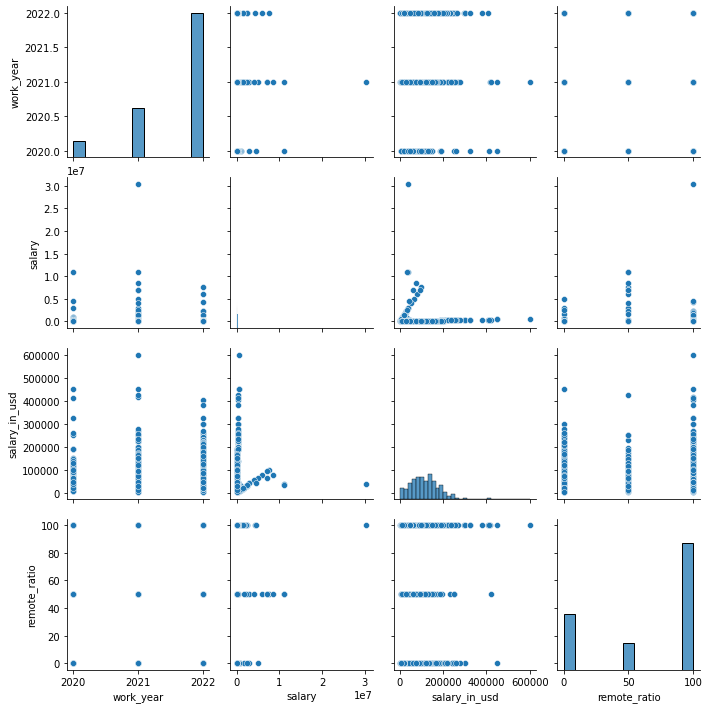

In [20]:
# pair plot
sns.pairplot(df)

Observasi: Kolom-kolom numerikal yang ada dalam data memiliki korelasi yang kecil terhadap satu sama lain.

# Machine Learning Modeling

### Data Preparation

In [21]:
df=pd.read_csv('salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Scientist,180000,USD,180000,US,100,US,L
1,2022,SE,FT,Data Scientist,165000,USD,165000,US,100,US,L
2,2022,SE,FT,Applied Machine Learning Scientist,108000,USD,108000,US,0,US,L
3,2021,EN,FT,Machine Learning Research Engineer,20000,USD,20000,FR,50,FR,M
4,2022,SE,FT,Data Architect,190000,USD,190000,US,100,US,M


### Encoding

In [22]:
# pisah data target dan data features
target=df['salary_in_usd']
feature=df.drop(columns=['salary_in_usd','salary','salary_currency'])

In [23]:
# mengurangi unique value dari kolom 'job_title' untuk mempermudah analisis dan pembuatan model machine learningnya
Data_Scientist = ['Data Scientist','Data Science Manager', 'Research Scientist', 'Machine Learning Scientist', 'AI Scientist', 
                  'Applied Machine Learning Scientist','Director of Data Science', 'ML Engineer','Data Science Consultant',
                  'Principal Data Scientist', 'Applied Data Scientist', 'Computer Vision Engineer', 'Lead Data Scientist',
                  'Machine Learning Developer', 'Computer Vision Software Engineer', 'Head of Data Science', 
                  'Machine Learning Engineer', 'Lead Machine Learning Engineer', '3D Computer Vision Researcher', 
                  'Machine Learning Research Engineer', 'NLP Engineer', 'Machine Learning Manager', 
                  'Head of Machine Learning', 'Staff Data Scientist']
Data_Engineer= ['Data Engineer','Analytics Engineer', 'Data Architect', 'ETL Developer', 'Data Engineering Manager', 'Lead Data Engineer',
                'Machine Learning Infrastructure Engineer', 'Data Analytics Engineer', 'Principal Data Engineer',
                'Data Science Engineer', 'Director of Data Engineering', 'Cloud Data Engineer', 'Big Data Engineer',
                'Data Operations Analyst','Data Manager', 'Data Operations Engineer', 'Cloud Data Architect']
Data_Analyst= ['Data Analyst','BI Data Analyst', 'Data Analytics Manager', 'Business Data Analyst', 'Data Specialist', 'Head of Data', 'Product Data Analyst', 'Financial Data Analyst', 'Lead Data Analyst', 'Principal Data Analyst', 'Applied Scientist', 'Data Analytics Lead', 'Data Analytics Consultant', 'Marketing Data Analyst', 'Big Data Architect', 'Finance Data Analyst']

def kategori_job(x):
    rtrn=''
    if x in Data_Scientist:
        rtrn='Data Scientist'
    elif x in Data_Engineer:
        rtrn='Data Engineer'
    elif x in Data_Analyst:
        rtrn='Data Analyst'
    else:
        rtrn='Another'
    return (rtrn)

feature['job_title']=feature['job_title'].apply(kategori_job)

In [24]:
# mengurangi unique value dari 2 kolom country untuk mempermudah analisis dan pembuatan model machine learningnya
countries_code=pd.read_csv('country_code_list.csv')
asia=[]
africa=[]
europe=[]
north_america=[]
oceania=[]
south_america=[]
antarctica=[]

for i in range(len(countries_code)):
    if countries_code.iloc[i][0]=='Asia':
        asia+=[countries_code.iloc[i][3]]
    elif countries_code.iloc[i][0]=='Africa':
        africa+=[countries_code.iloc[i][3]]
    elif countries_code.iloc[i][0]=='Europe':
        europe+=[countries_code.iloc[i][3]]
    elif countries_code.iloc[i][0]=='North America':
        north_america+=[countries_code.iloc[i][3]]
    elif countries_code.iloc[i][0]=='Oceania':
        oceania+=[countries_code.iloc[i][3]]
    elif countries_code.iloc[i][0]=='South America':
        south_america+=[countries_code.iloc[i][3]]
    elif countries_code.iloc[i][0]=='Antarctica':
        antarctica+=[countries_code.iloc[i][3]]

def country(x):
    rtrn=''
    if x in asia:
        rtrn='Asia'
    elif x in africa:
        rtrn='Africa'
    elif x in europe:
        rtrn='Europe'
    elif x in north_america:
        rtrn='North America'
    elif x in oceania:
        rtrn='Oceania'
    elif x in south_america:
        rtrn='South America'
    elif x in antarctica:
        rtrn='Antarctica'
    else:
        rtrn='Another'
    return (rtrn)

feature['employee_residence']=feature['employee_residence'].apply(country)
feature['company_location']=feature['company_location'].apply(country)

In [25]:
# Encoding kolom "experience_level"
experience={'EN':0,'MI':1,'SE':2,'EX':3}
feature['experience_level']=feature['experience_level'].map(experience)

In [26]:
# Encoding kolom "company_size"
size={'S':0,'M':1,'L':2}
feature['company_size']=feature['company_size'].map(size)

In [27]:
# men-drop kolom "employee_residence" karena kolom tersebut memiliki korelasi yang sangat tinggi dengan kolom "company_location"
feature=feature.drop(columns=['employee_residence'])

In [28]:
# Encoding kolom "experience_level", "employment_type","job_title","company_location"
feature=pd.get_dummies(data=feature,columns=['experience_level','employment_type','job_title','company_location'])

### Data Normalization

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
feature[['work_year','remote_ratio','company_size']]=scaler.fit_transform(feature[['work_year','remote_ratio','company_size']])

In [30]:
pd.options.display.max_columns = None
feature.head()

,work_year,remote_ratio,company_size,experience_level_0,experience_level_1,experience_level_2,experience_level_3,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_Data Analyst,job_title_Data Engineer,job_title_Data Scientist,company_location_Africa,company_location_Asia,company_location_Europe,company_location_North America,company_location_Oceania,company_location_South America
0,1.0,1.0,1.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,1.0,1.0,1.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,1.0,0.0,1.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,0.5,0.5,0.5,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
4,1.0,1.0,0.5,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0


### Split Data

In [31]:
from sklearn.model_selection import train_test_split

feature_train, feature_test_validate, target_train, target_test_validate = train_test_split(feature, target, test_size=0.2, random_state=42)
feature_validate, feature_test, target_validate, target_test = train_test_split(feature_test_validate, target_test_validate, test_size=0.5, random_state=42)

### Feature Selection

In [32]:
feature_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759 entries, 935 to 102
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   work_year                       759 non-null    float64
 1   remote_ratio                    759 non-null    float64
 2   company_size                    759 non-null    float64
 3   experience_level_0              759 non-null    uint8  
 4   experience_level_1              759 non-null    uint8  
 5   experience_level_2              759 non-null    uint8  
 6   experience_level_3              759 non-null    uint8  
 7   employment_type_CT              759 non-null    uint8  
 8   employment_type_FL              759 non-null    uint8  
 9   employment_type_FT              759 non-null    uint8  
 10  employment_type_PT              759 non-null    uint8  
 11  job_title_Data Analyst          759 non-null    uint8  
 12  job_title_Data Engineer         75

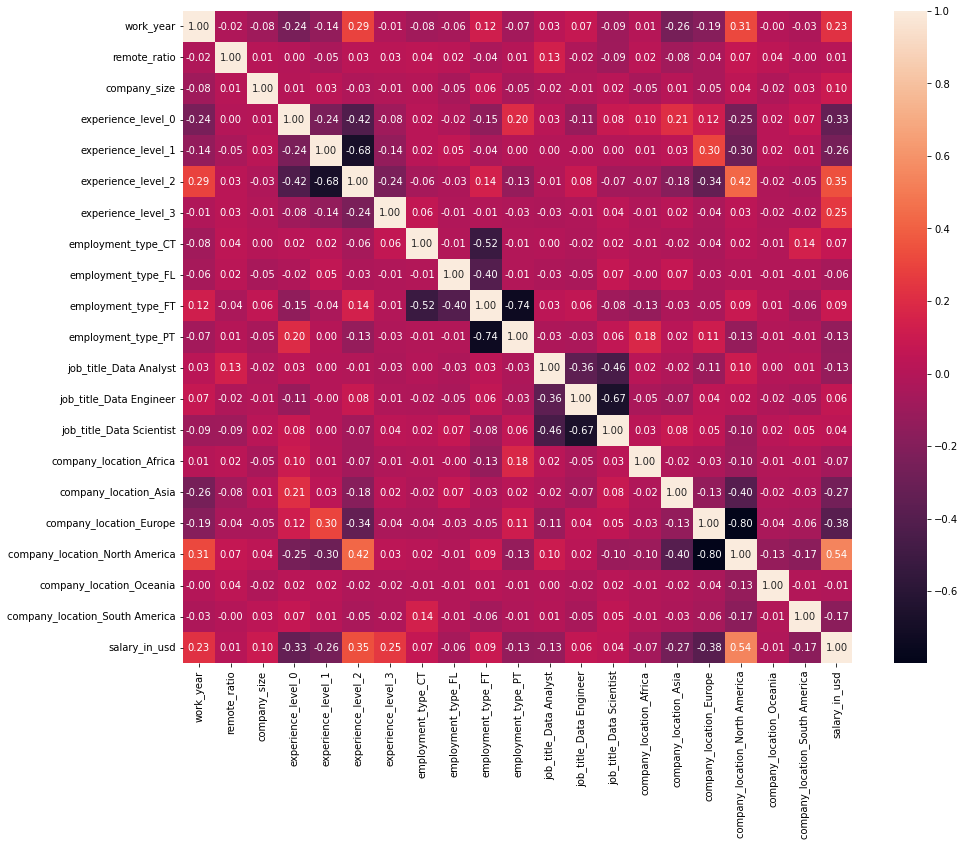

In [33]:
# membuat heatmap correlation
data_train = pd.concat([feature_train, target_train], axis=1)
corr = data_train.corr()

plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

### Model Training

#### Finding Parameter for ElasticNet Model

In [34]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_converter = PolynomialFeatures(degree=1,include_bias=False)
feature_train = polynomial_converter.fit_transform(feature_train)
feature_validate = polynomial_converter.transform(feature_validate)
feature_test = polynomial_converter.transform(feature_test)

In [35]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(max_iter=1000000)
parameter_grid={'alpha':[0.1,1,10,100],'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}


In [36]:
from sklearn.model_selection import GridSearchCV

grid_model=GridSearchCV(estimator=model,param_grid=parameter_grid,scoring='neg_mean_squared_error',cv=5,verbose=1)
grid_model.fit(feature_train,target_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=1000000),
             param_grid={'alpha': [0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [37]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.9}

#### Training Model

In [38]:
# Polynomial Feature
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
feature_train = polynomial_converter.fit_transform(feature_train)
feature_validate = polynomial_converter.transform(feature_validate)
feature_test = polynomial_converter.transform(feature_test)

In [39]:
# Model Training
model = ElasticNet(max_iter=1000000,alpha=0.1,l1_ratio=0.9)
model.fit(feature_train,target_train)
# parameter_grid={'alpha':[0.1],'l1_ratio':[.9]}


ElasticNet(alpha=0.1, l1_ratio=0.9, max_iter=1000000)

#### Evaluate Model

In [40]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

target_predict=model.predict(feature_validate)
print("RMSE for testing data is {}".format(np.sqrt(mean_squared_error(target_validate,target_predict))))
print("MAE for testing data is {}".format(mean_absolute_error(target_validate,target_predict)))
print("MAPE for testing data is {}%".format(mean_absolute_percentage_error(target_validate,target_predict)))

RMSE for testing data is 47476.23655142554
MAE for testing data is 35502.92443277184
MAPE for testing data is 0.6640706523502142%
